In [418]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import scipy.io.wavfile
from scipy.io.wavfile import write
import IPython


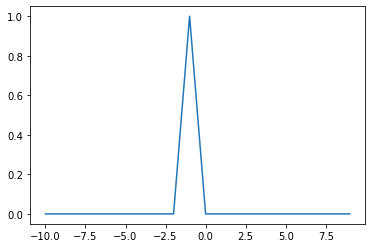

In [371]:
def ak(x ,T,k):
    #     T is period time
    w0=2*np.pi/T
    loop = np.arange(0,T, step=0.01)
    integral_res = np.sum(x(loop)*np.exp(-1j*k*w0*loop)) /T
    return integral_res/100

x= lambda t: np.exp(-1j*t*2*np.pi)
k_list=range(-10,10)

plt.plot(k_list,[ak(x,1 , i) for i in k_list ])
    

In [60]:
def x_with_fourier_serie(x,k_list,T):
    w0=2*np.pi/T
    
    sigma = lambda t: sum([ak(x,T,k)*np.exp(1j*k*w0*t) for k in k_list]) 
    return sigma



# for example 

the coefficients are : 
{'a-3': 0.0, 'a-2': 0.0, 'a-1': 0.5, 'a0': 0.0, 'a1': 0.5, 'a2': 0.0}



 plot the x  with some of coefficients


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


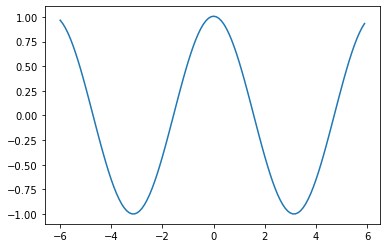

In [68]:
x= lambda t: np.cos(t)
k_list=range(-3,3)

t=np.arange(-6,6,step=0.1)
print("the coefficients are : ")
print({f"a{k}":int(ak(x,2*np.pi , k).real*10)/10 for k in k_list})

print("\n\n\n plot the x  with some of coefficients")
plt.plot(t,x_with_fourier_serie(x , k_list,2*np.pi)(t))

همانطور که میبینیم باز هم تابع کوسینوس رسم شد چون برای ساخت این تابع در سری فوریه تنها نیاز به 

a-1=1/2 , a1=1/2


است

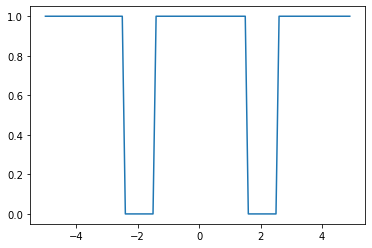

In [237]:
square_signal = lambda t ,t0,T : (np.sign(signal.square(((t+t0/2)/T+1)*2*np.pi,duty=t0/T))+1)/2

# signal.square(((t+(T-t0)/2)*2*np.pi)/T,duty=t0/T)
t= np.arange(-5,5 , step=0.1)

plt.plot(t,square_signal(t, t0=3,T=4))
# plt.plot(t,square_signal(t*2, t0=1,T=5))


# Q1
## آ
اول باید دو تابع خواسته شده را بدست اورد


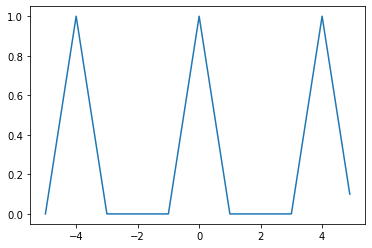

In [249]:

y1 =lambda t: np.abs((np.mod(t,2)) - 1)*square_signal(t,2,4)
t= np.arange(-5,5 , step=0.1)

plt.plot(t,y1(t))



array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
       1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ,
       1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9])

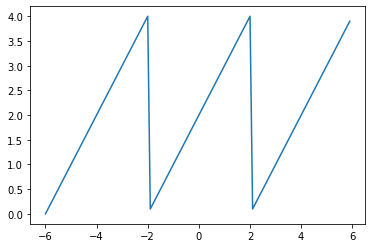

In [269]:
y2 =lambda t: np.mod(t+2,4)
t= np.arange(-6,6 , step=0.1)

plt.plot(t,y2(t))
y2(t)

# a) 
## k in [0,2]  Y1(t)

[0, 1, 2]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


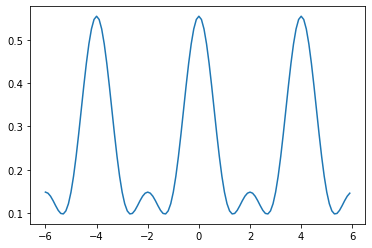

In [260]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,3)
plt.plot(t,x_with_fourier_serie(y1 , k_list,4)(t))
print(list(k_list))

## k in [0,2]  Y2(t)

[0, 1, 2]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


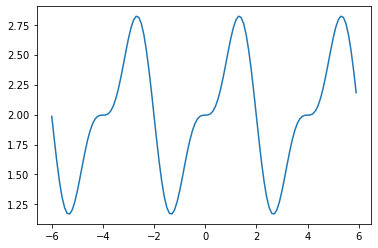

In [265]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,3)
plt.plot(t,x_with_fourier_serie(y2 , k_list,4)(t))
print(list(k_list))

# b)
### k in [0,10]  Y1(t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


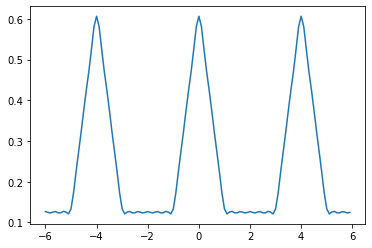

In [270]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,11)
plt.plot(t,x_with_fourier_serie(y1 , k_list,4)(t))
print(list(k_list))

### k in [0,10]  Y2(t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


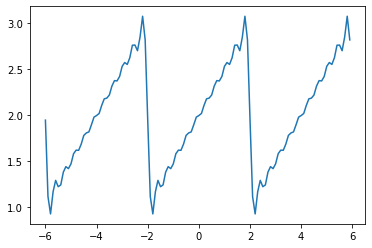

In [271]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,11)
plt.plot(t,x_with_fourier_serie(y2 , k_list,4)(t))
print(list(k_list))

# c) 
## k in [0,50]  Y1(t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


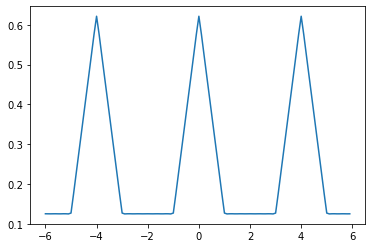

In [267]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,51)
plt.plot(t,x_with_fourier_serie(y1 , k_list,4)(t))
print(list(k_list))

## k in [0,50]  Y2(t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


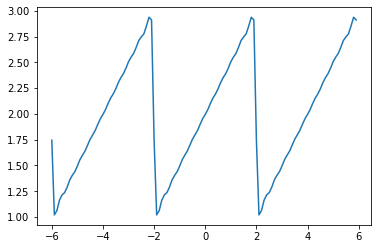

In [268]:
t= np.arange(-6,6 , step=0.1)
k_list = range(0,51)
plt.plot(t,x_with_fourier_serie(y2 , k_list,4)(t))
print(list(k_list))

# d)
## k in [100,200]  Y1(t)

/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


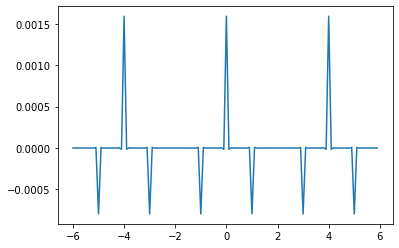

In [273]:
t= np.arange(-6,6 , step=0.1)
k_list = range(100,201)
plt.plot(t,x_with_fourier_serie(y1 , k_list,4)(t))


## k in [100,200]  Y2(t)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


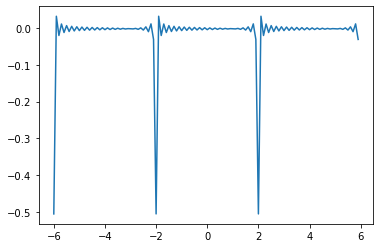

In [274]:
t= np.arange(-6,6 , step=0.1)
k_list = range(100,201)
plt.plot(t,x_with_fourier_serie(y2 , k_list,4)(t))
print(list(k_list))

## )ب

# Q2

In [324]:
y= scipy.io.wavfile.read("./sound.wav")
y[0]

44100

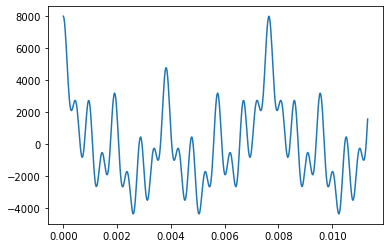

In [414]:
sample_rate_per_Sec = y[0]
# T = 0.06116 s
count= 500
t=np.arange(0,10 ,step=1/sample_rate_per_Sec)
plt.plot(t[:count],y[1][:count])

0.007619047619047619

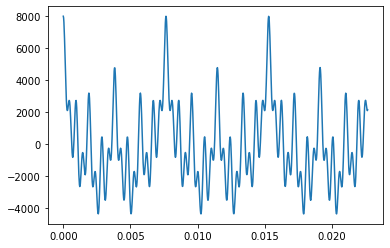

In [421]:
def what_is_x_when_y_is(t, x, y):
    return np.interp(t, x, y)

x=np.arange(0,100 ,step=1/sample_rate_per_Sec)
the_y= y[1]

y_fun= lambda t : what_is_x_when_y_is(t ,x[:len(the_y)],the_y)
# One-dimensional linear interpolation

t=np.arange(0,10 ,step=1/sample_rate_per_Sec)
plt.plot(t[:1000], y_fun(t)[:1000])


T = t[np.argmax(y_fun(t)[1:1000])]
T

  markerfacecolor: color


/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(10500+0j)

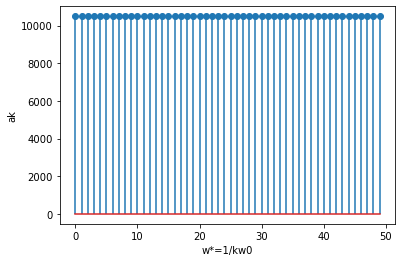

In [422]:
markerline1, stemlines, _ = plt.stem(list(range(0,50)) , [ak(y_fun , T ,k)for k in range(0,50)],'.' )
plt.setp(markerline1, 'markerfacecolor')
plt.xlabel('w*=1/kw0')
plt.ylabel('ak')
ak(y_fun ,T ,0)

/home/hosein/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


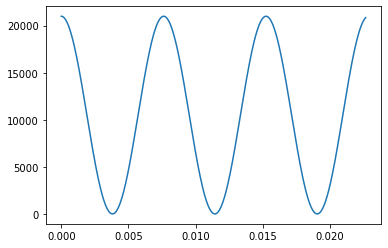

In [411]:
plt.plot(t[:1000], x_with_fourier_serie(x=y_fun , k_list=[0,1],T=T)(t[:1000]))

In [416]:

data = x_with_fourier_serie(x=y_fun , k_list=[0,1],T=T)(t)
write("example.wav", sample_rate_per_Sec, data.astype(np.int16))

<ipython-input-416-8f05ee59eafb>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example.wav", sample_rate_per_Sec, data.astype(np.int16))


In [419]:

IPython.display.Audio('./example.wav')

In [417]:

data = x_with_fourier_serie(x=y_fun , k_list=[150,151],T=T)(t)
write("example2.wav", sample_rate_per_Sec, data.astype(np.int16))

<ipython-input-417-046a0da724e0>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example2.wav", sample_rate_per_Sec, data.astype(np.int16))


In [420]:
IPython.display.Audio('./example2.wav')

### هر چه فرکانس بالاتر صدا زیر تر میشود